In [9]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 


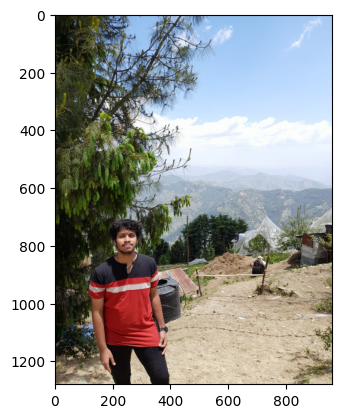

In [10]:


full_face = cv2.CascadeClassifier('face.xml')
path=str(input("enter the path of the image"))
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
full_face= full_face.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6)
connect=[]
for (x, y, w, h) in full_face:
    center_x = x + (w // 2)
    center_y = y + (h // 2)
    radius = int(0.5 * ((w ** 2 + h ** 2) ** 0.5))*3
    # cv2.circle(image, (center_x, center_y), radius, (0,0,255), 2)
    connect.append([center_x,center_y,radius])
color_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(color_image)
cv2.imshow('Full Face Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


-1

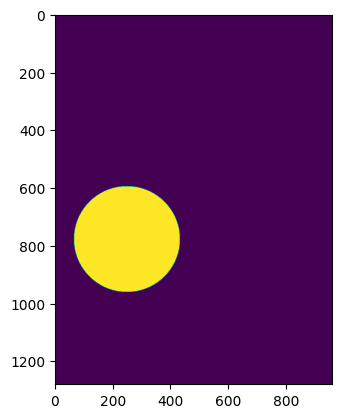

In [11]:
mask = np.zeros(image.shape[:2], dtype="uint8")
for para in connect:
    cv2.circle(mask, (para[0], para[1]),para[2], 255, -1)
plt.imshow(mask)
blurred_region = cv2.GaussianBlur(image, (29,29), sigmaX=10)
mask2=~mask
blurred_img = cv2.bitwise_and(blurred_region, blurred_region, mask=mask2)
attach_img=cv2.bitwise_and(image,image,mask=mask)
result=blurred_img+attach_img
cv2.imshow('Full Face Detection', result)
cv2.waitKey(0)


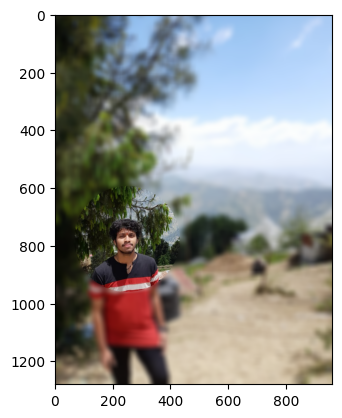

In [14]:
color_result=cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
plt.imshow(color_result)

In [13]:
output_filename = r'C:\Users\K NONIESH REDDY\OneDrive\Desktop\3rd year\cv\ass4\static\bokeh_image.jpg'
cv2.imwrite(output_filename,result)

True